In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import process_edu as pe
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style({'font.family': 'Times New Roman'})
current_palette = sns.color_palette()
sns.set_palette([current_palette[2],current_palette[0], current_palette[1]])

In [2]:
# 15 values 0-indexed
sheet_list= [0,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]
frame_list = []
for sheets in sheet_list:
    frame_list.append(pe.process_edu(11,sheet_name=sheets))

In [3]:
#we want to be able to call them by metro name not just number
metro_names = ['US','San Francisco','Washington DC', 'Atlanta',
               'Boston','Detroit','Houston','Phoenix','Miami',
               'Philadelphia','Riverside','Dallas','Chicago',
               'New York','Seattle','Los Angeles']
frame_dict=dict(zip(metro_names,frame_list))

In [4]:
# we want to work with dataframes that have only the values that we are interested in
race_rows = ['Hispanic or Latino (may be of any race)','White alone, not Hispanic','Black alone, not Hispanic',
            'Asian alone, not Hispanic','Two or more races + Other races, not Hispanic']
for places in frame_dict.keys():
    frame_dict[places] = frame_dict[places].loc[race_rows]

In [19]:
#easy way to pass what to plot
graph_list=['% Provided by the children’s school or school district to use outside of school(device)',
            '% Provided by someone in the household or family, or it is the child’s(device',
            '% Provided by another source(device)',
            '% Paid for by the children’s school or school district(internet)',
            '% Paid for by someone in the household or family(internet)',
            '% Paid for by another source(internet)']

Text(0.5, 1.0, 'Source of Computer/Device Available to Children for Educational Purposes by Race')

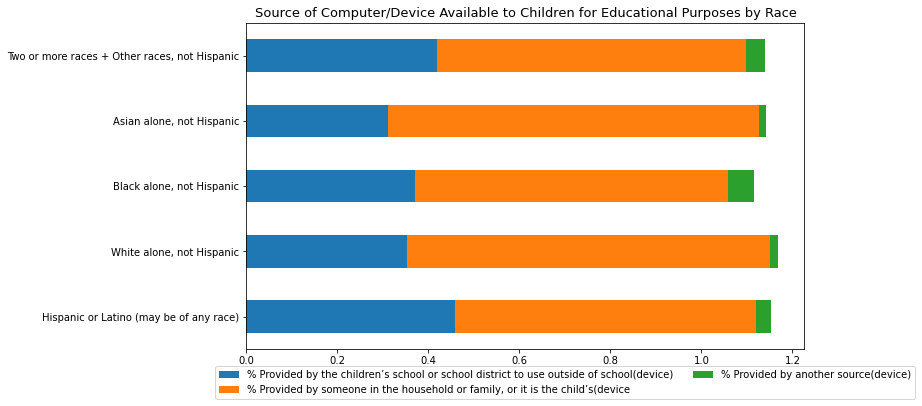

In [30]:
frame_dict['US'][graph_list[0:3]].plot.barh(stacked=True, figsize=(10,6))
plot.legend(bbox_to_anchor=(.2, -0.15, 1., .102), loc='best',
               ncol=2, borderaxespad=0.1)
plot.title('Source of Computer/Device Available to Children for Educational Purposes by Race', fontsize=13)

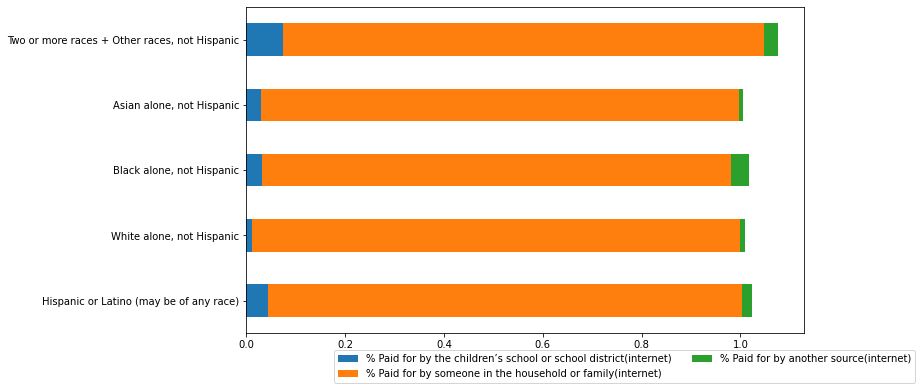

In [28]:
frame_dict['US'][graph_list[3:]].plot.barh(stacked=True, figsize=(10,6))
plot.legend(bbox_to_anchor=(.2, -0.15, 1., .102), loc='best',
               ncol=2, borderaxespad=0.1)

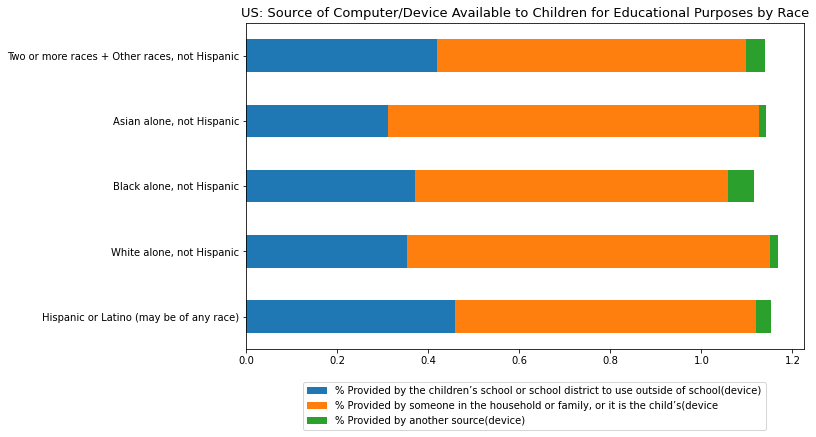

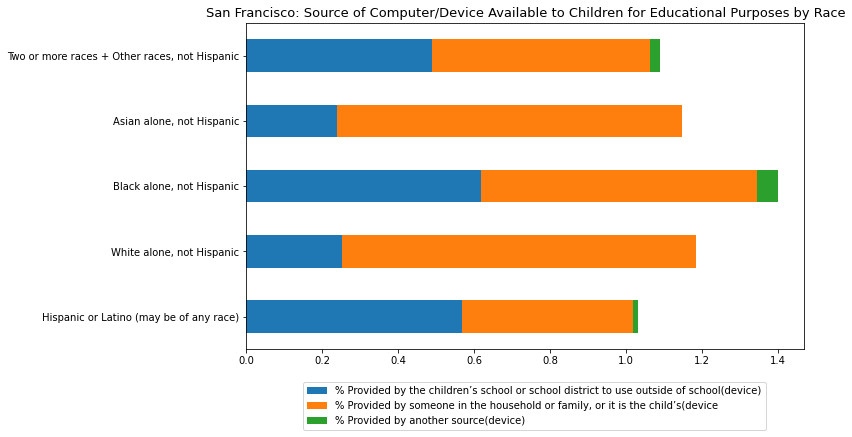

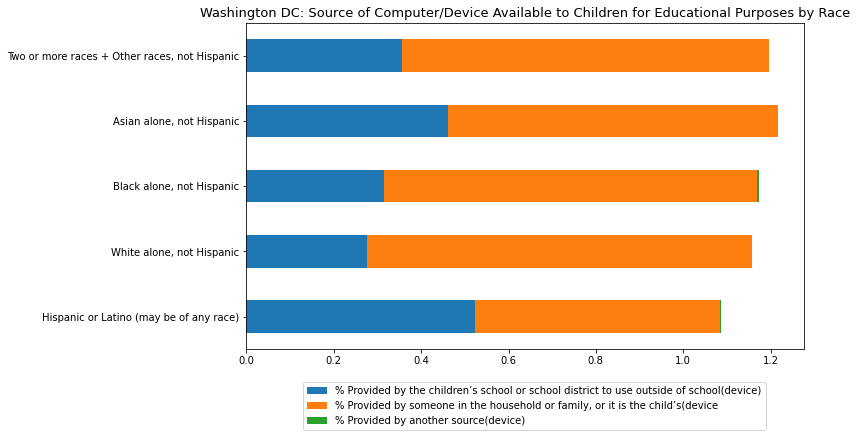

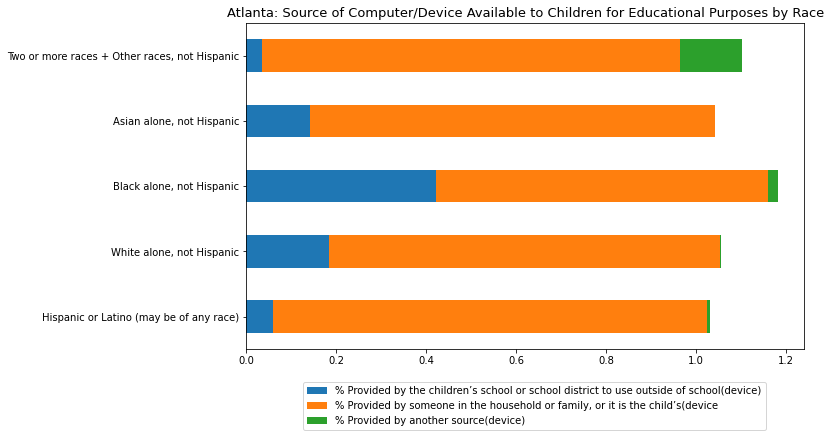

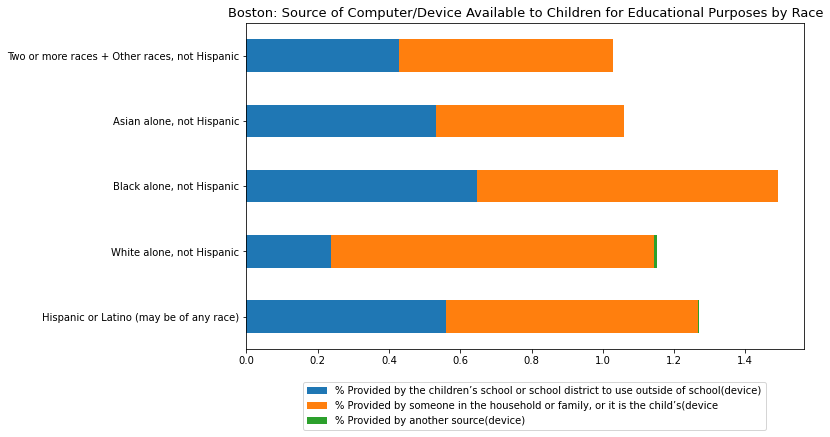

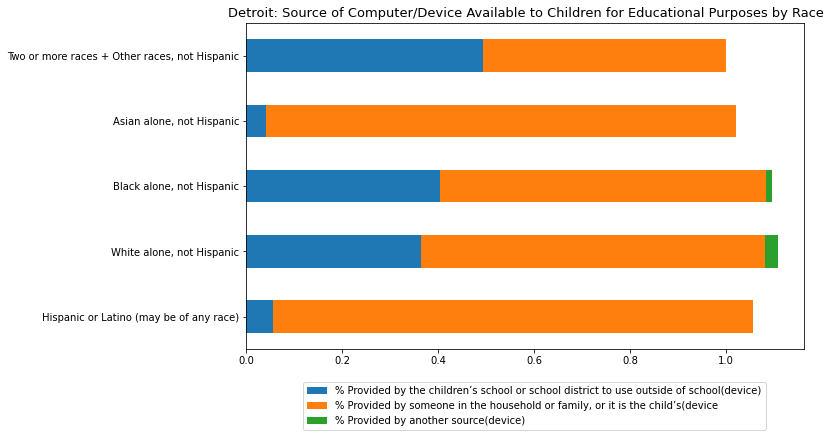

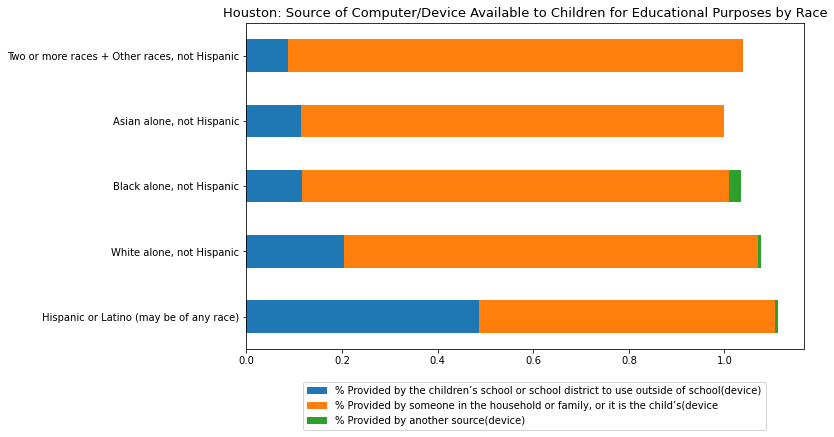

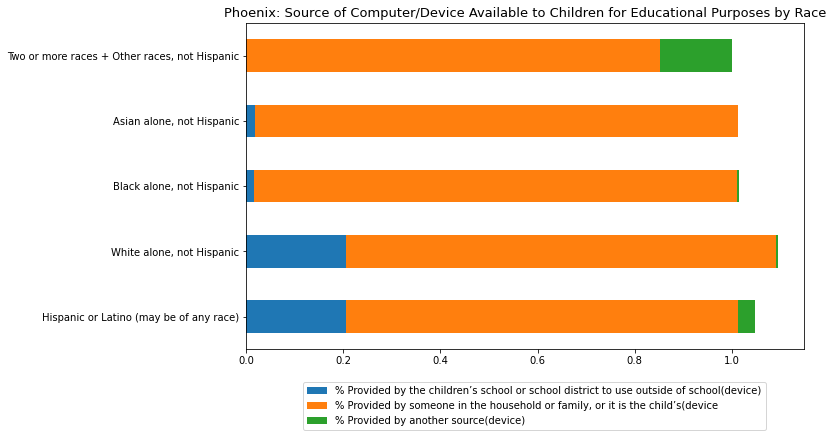

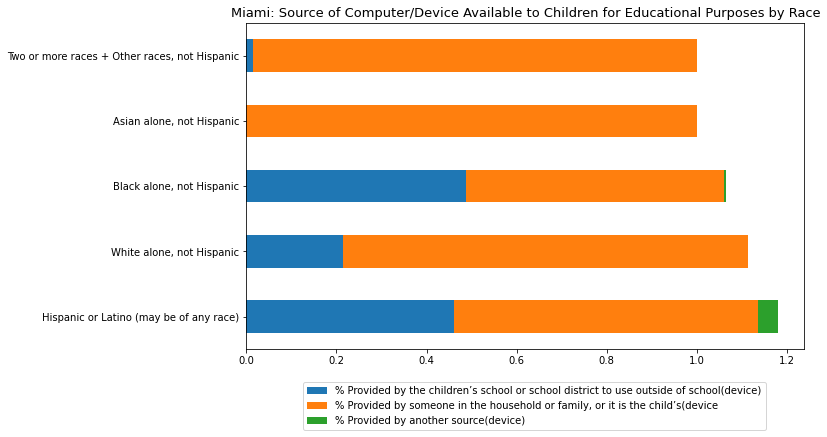

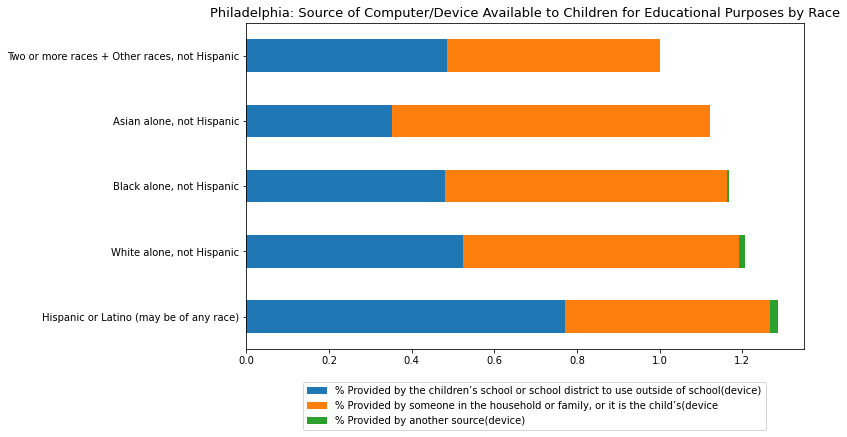

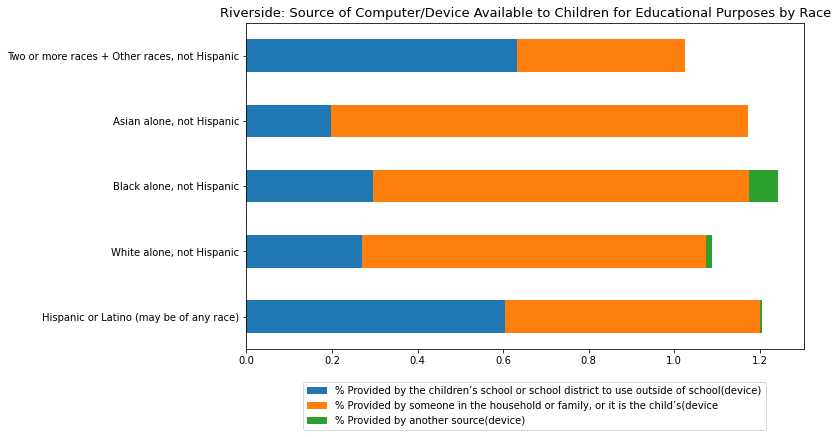

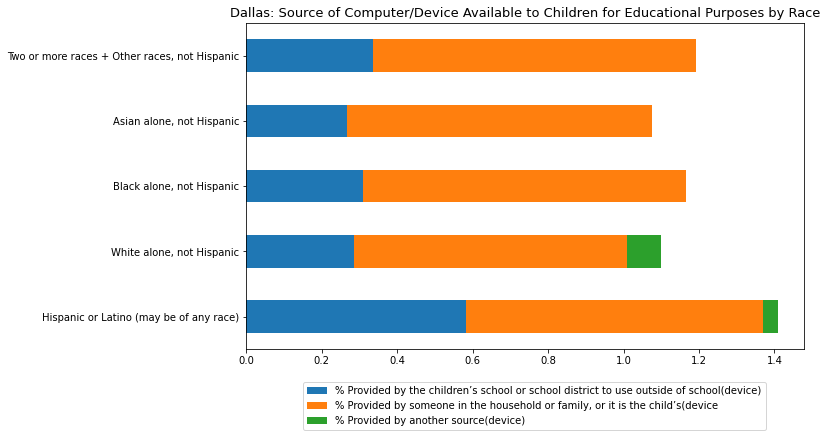

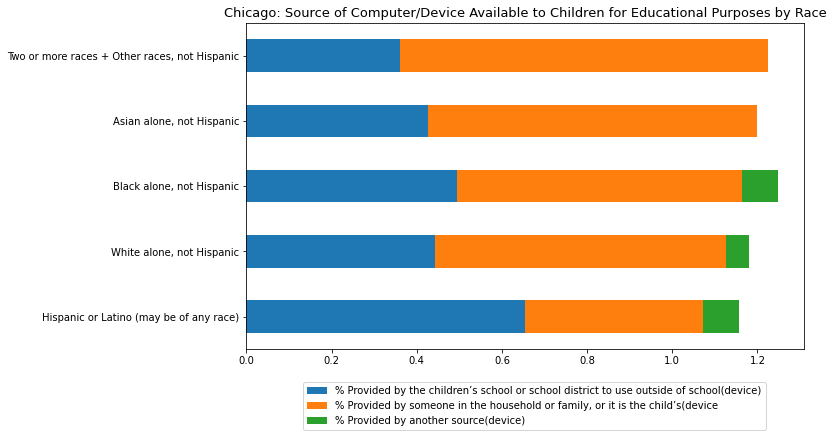

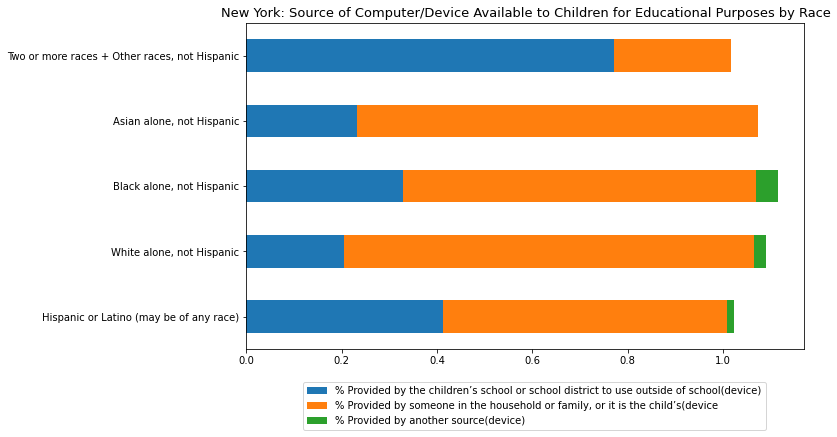

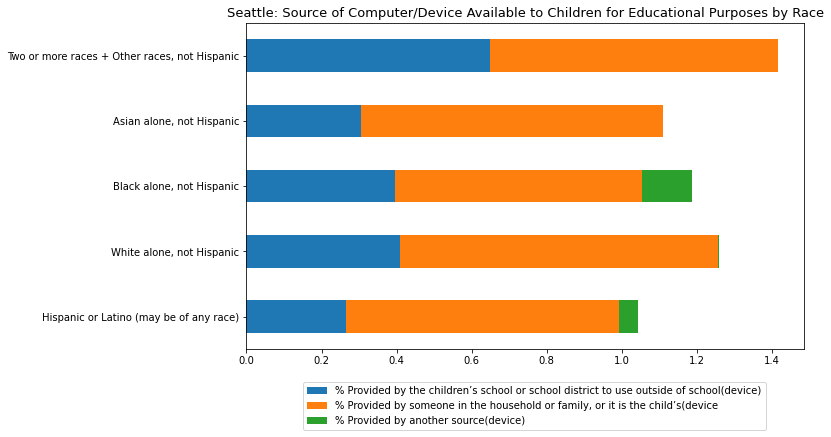

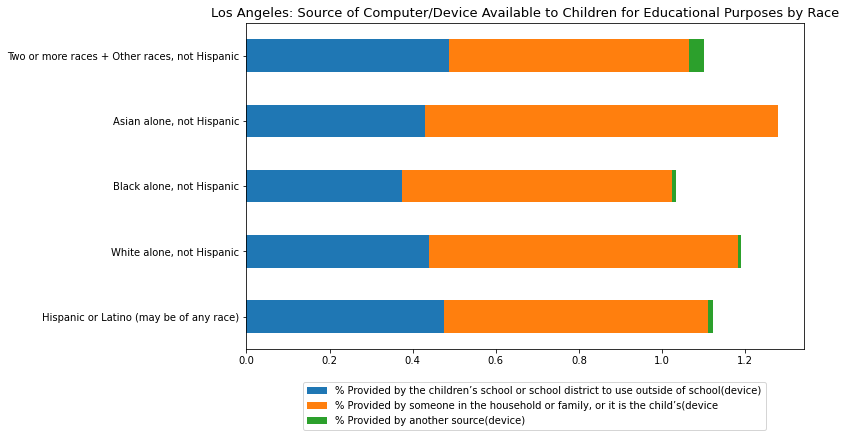

In [54]:
# within the same week, the best way to compare is accross MSAs
for places in frame_dict.keys():
    frame_dict[places][graph_list[0:3]].plot.barh(stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(places + ': Source of Computer/Device Available to Children for Educational Purposes by Race', fontsize=13)

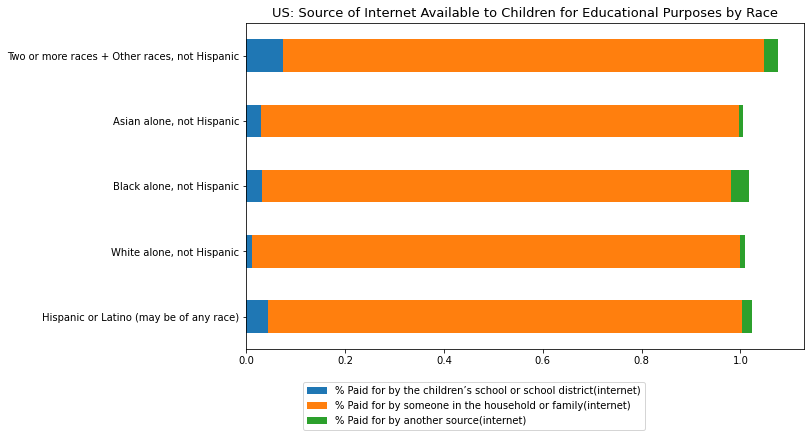

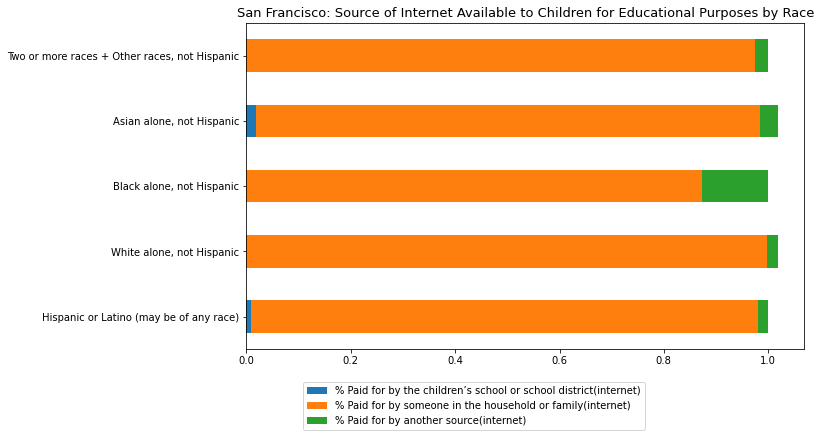

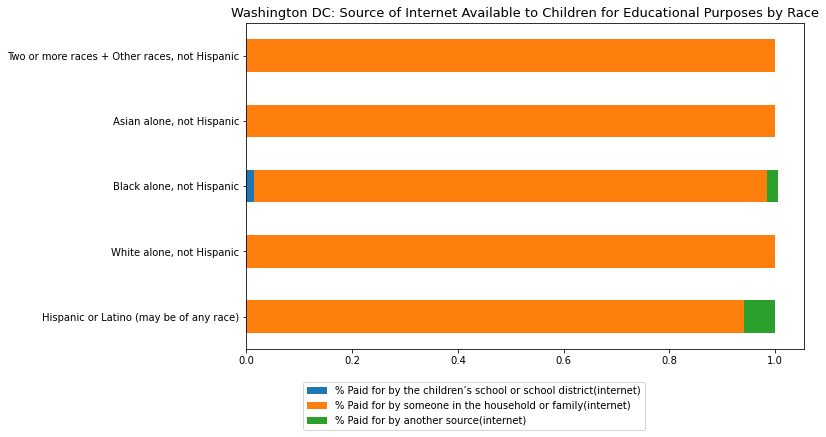

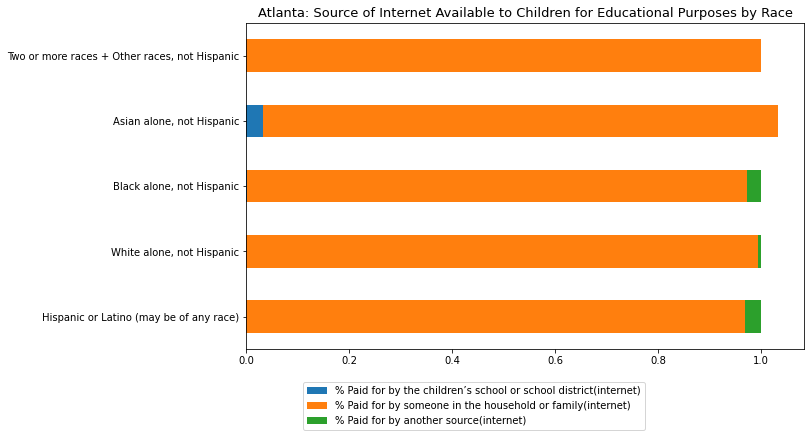

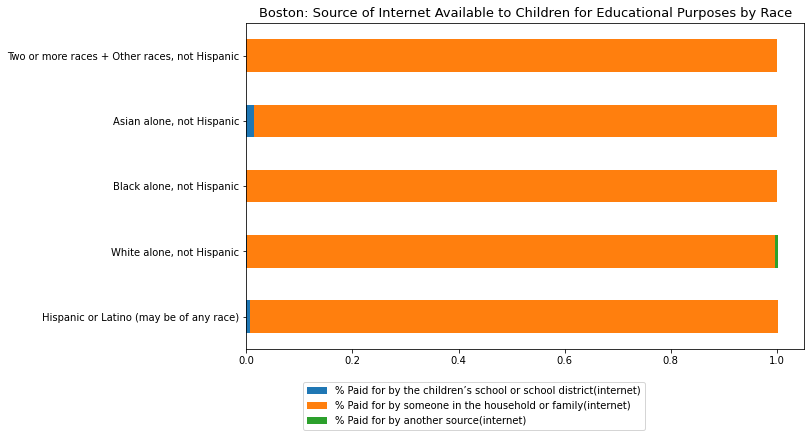

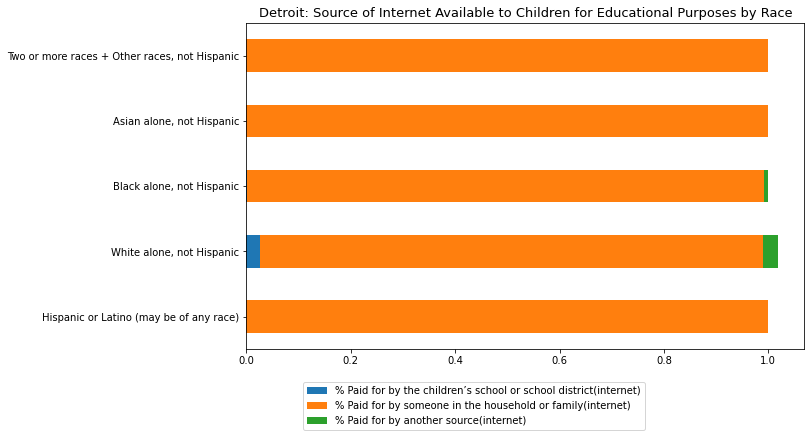

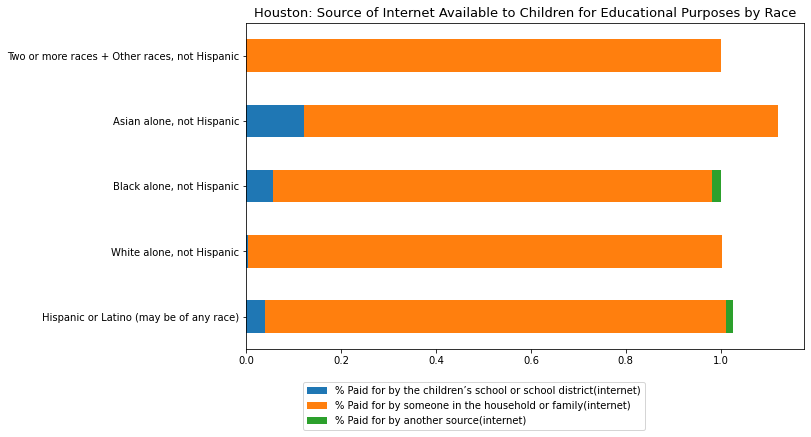

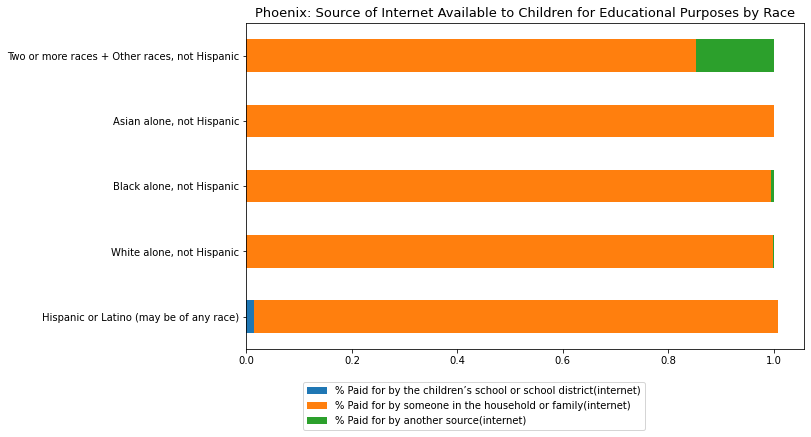

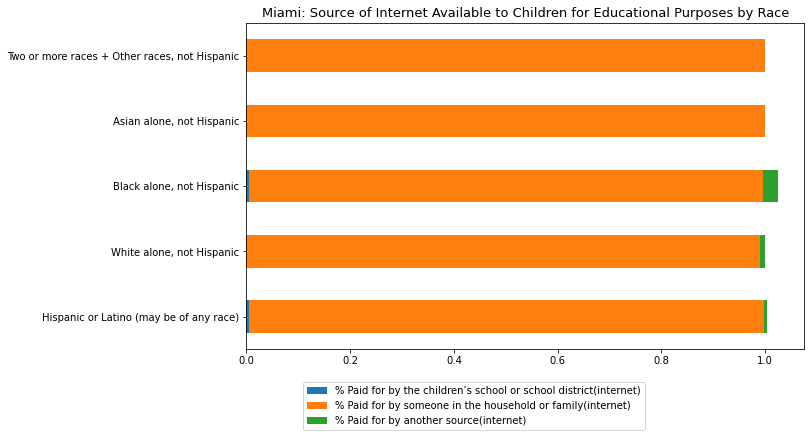

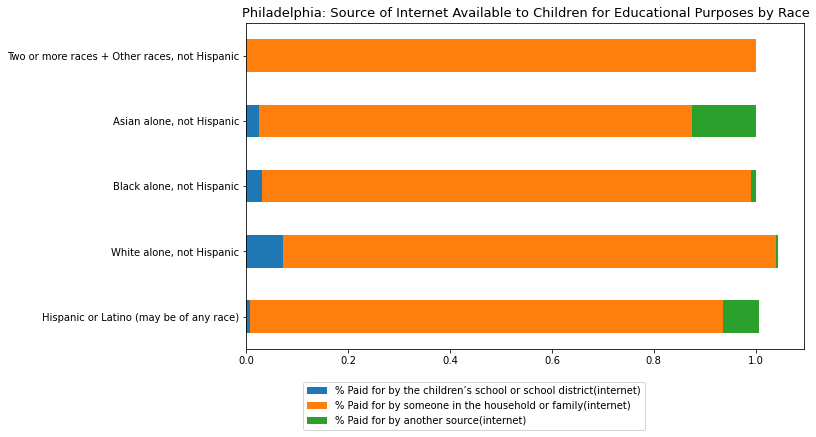

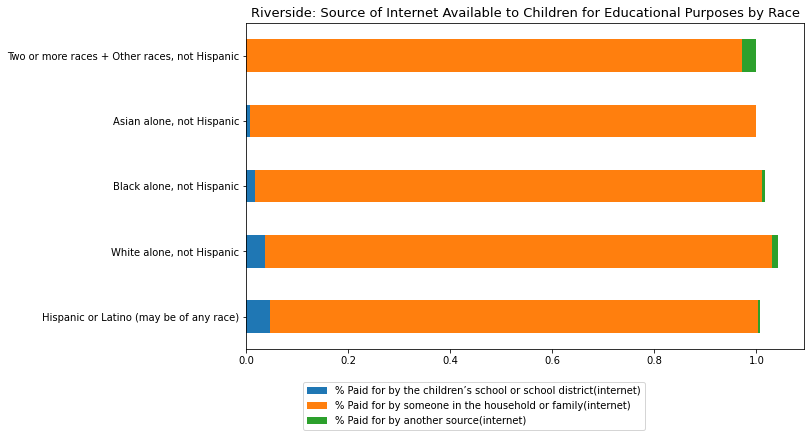

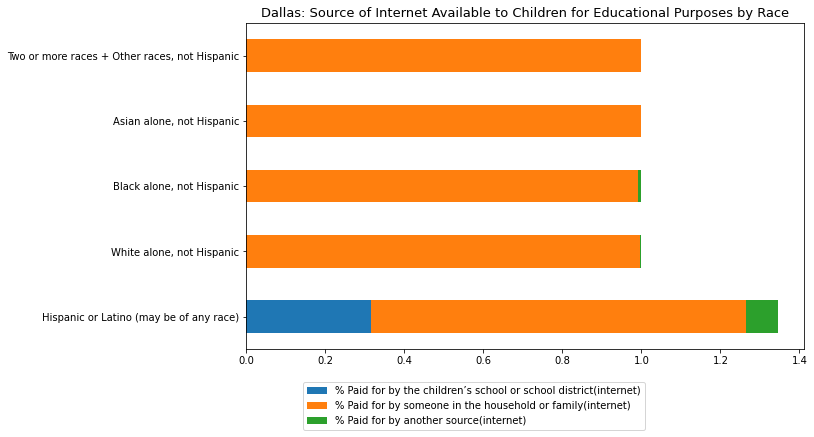

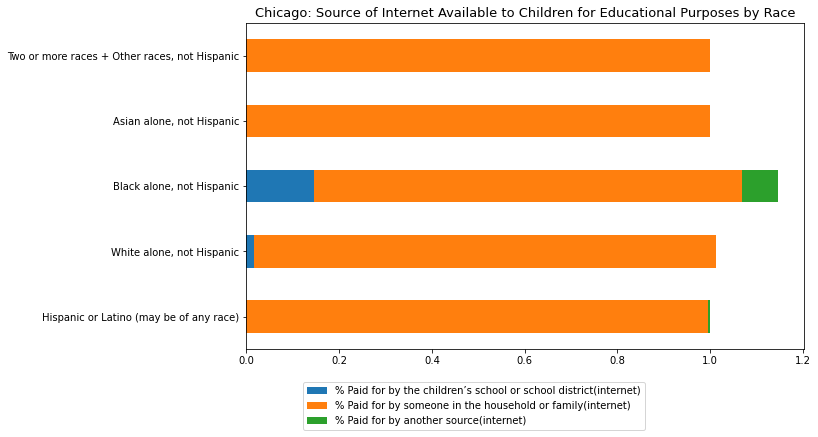

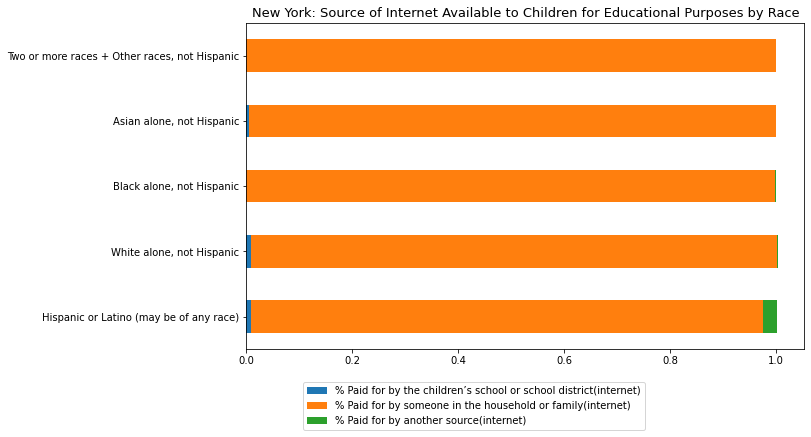

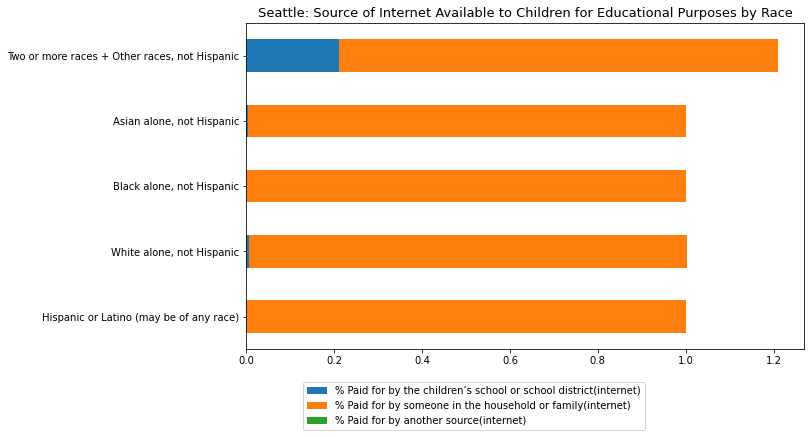

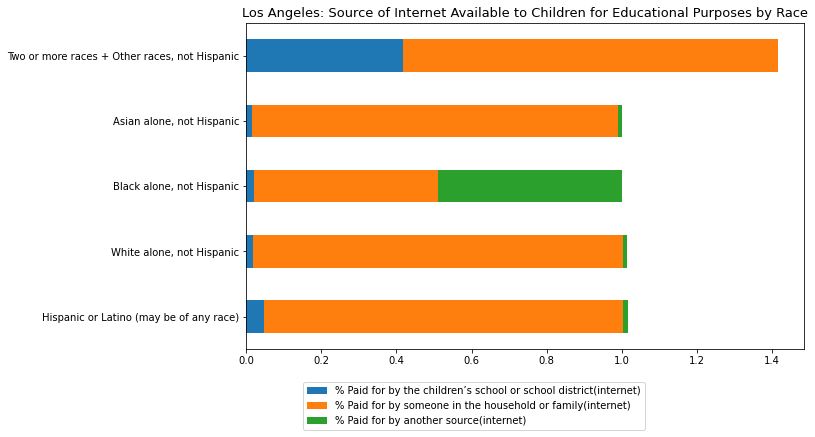

In [55]:
# within the same week, the best way to compare is accross MSAs
for places in frame_dict.keys():
    frame_dict[places][graph_list[3:]].plot.barh(stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(places + ': Source of Internet Available to Children for Educational Purposes by Race', fontsize=13)